In [71]:
import numpy as np
import pandas as pd

In [72]:
df_features_data : pd.DataFrame = pd.read_csv('final_features.csv')

In [73]:
df_features_data.columns

Index(['Quantity', 'TotalValue', 'Price', 'AvgTransactionValue',
       'DaysSinceLastTransaction', 'UniqueProductsPurchased', 'Region_Europe',
       'Region_North America', 'Region_South America', 'FavCategory_Clothing',
       ...
       'FavProduct_P076', 'FavProduct_P078', 'FavProduct_P079',
       'FavProduct_P080', 'FavProduct_P081', 'FavProduct_P082',
       'FavProduct_P087', 'FavProduct_P094', 'FavProduct_P096',
       'FavProduct_P100'],
      dtype='object', length=111)

In [74]:
from sklearn.cluster import KMeans
from sklearn.metrics import davies_bouldin_score

In [75]:
db_scores : list[float] = []
k_values : list[int] = range(2,11)

for k in k_values:
    kmeans :KMeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(df_features_data)
    db: float = davies_bouldin_score(df_features_data, kmeans.labels_)
    db_scores.append(db)

optimal_k : int = k_values[np.argmin(db_scores)]
print(db_scores)
optimal_k

[2.4367213393602216, 2.719457229082233, 2.6981673548972283, 2.478841931887928, 2.795135219656063, 2.793411784470813, 2.8010456853563364, 2.7969829885764117, 2.7566149887214144]


2

In [76]:
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA

In [77]:
from matplotlib.collections import PathCollection

def graph_plot(k: int , data: np.ndarray, labels: np.ndarray) -> None:
  """Visualize clustered data"""
  plt.figure(figsize=(10, 6))
  scatter: PathCollection = plt.scatter(data[:, 0], data[:, 1], c=labels, cmap="viridis", alpha=0.6)
  plt.title(f"Cluster Visualization (PCA) - k={k}")
  plt.xlabel("Principal Component 1")
  plt.ylabel("Principal Component 2")
  plt.colorbar(scatter, label="Cluster")
  plt.show()

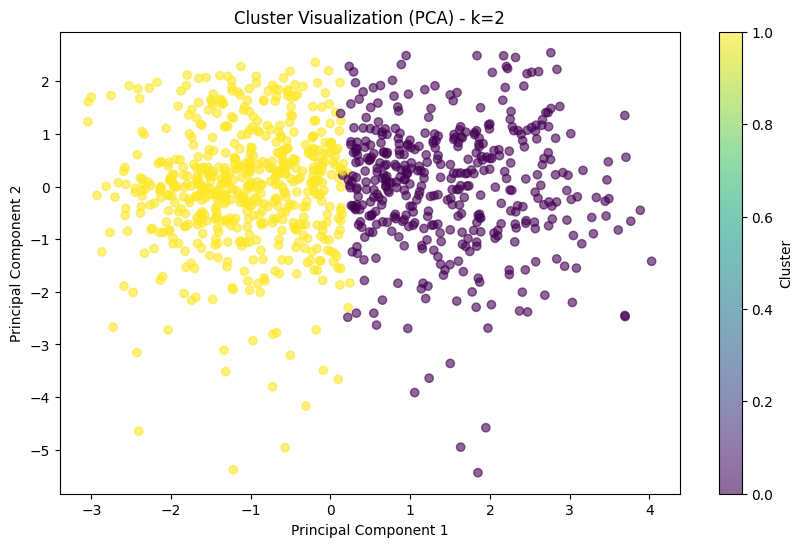

In [78]:
pca : PCA = PCA(n_components=2)
pca_data : np.ndarray = pca.fit_transform(df_features_data)
kmeansOptimal : KMeans = KMeans(n_clusters=optimal_k, random_state=42)
kmeansOptimal.fit(pca_data)
labels : np.ndarray = kmeansOptimal.fit_predict(df_features_data)
graph_plot(optimal_k, pca_data, labels)

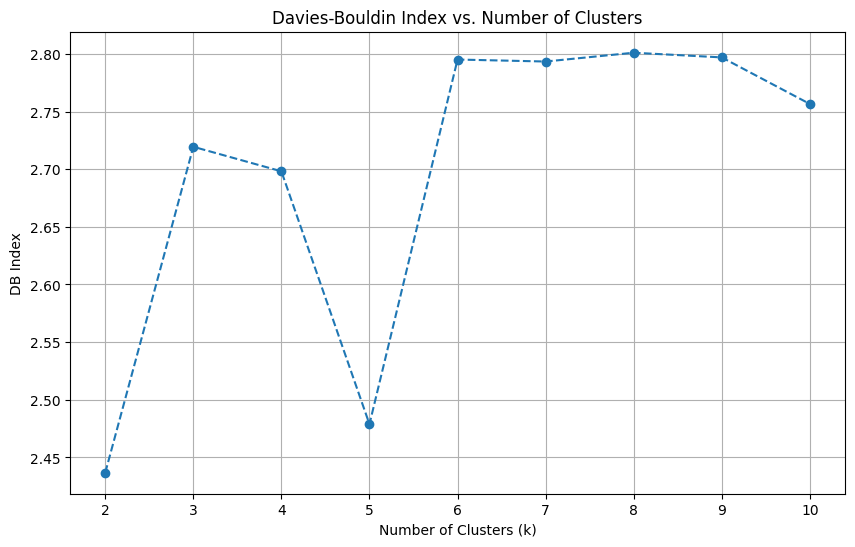

In [79]:
plt.figure(figsize=(10, 6))
plt.plot(k_values, db_scores, marker="o", linestyle="--")
plt.title("Davies-Bouldin Index vs. Number of Clusters")
plt.xlabel("Number of Clusters (k)")
plt.ylabel("DB Index")
plt.xticks(k_values)
plt.grid(True)
plt.show()

# K-means Clustering Analysis Report: Optimal Cluster Determination and Visualization

## Executive Summary
Our analysis employs the Davies-Bouldin index and Principal Component Analysis to determine and validate the optimal number of clusters in the dataset. The results strongly indicate that a two-cluster solution provides the most effective segmentation of the data.

## Davies-Bouldin Score Analysis

The Davies-Bouldin (DB) index evaluation across different cluster numbers (k=2 to k=10) reveals compelling evidence for a two-cluster solution. This index measures cluster quality by assessing both internal cluster cohesion and between-cluster separation, where lower scores indicate superior clustering.

Our systematic analysis shows that k=2 achieves the optimal DB score of 2.4367. The score pattern across different k values tells an interesting story: Moving from k=2 to k=3, we observe an increase to 2.7195, indicating a degradation in cluster quality. While k=4 shows a marginal improvement (2.6982), it remains significantly higher than the k=2 solution. The score for k=5 (2.4788) approaches the k=2 performance but doesn't surpass it. Beyond this point, scores stabilize between 2.75 and 2.80 for k=6 through k=10, suggesting no additional value from increasing cluster numbers.

## Principal Component Analysis (PCA) Visualization

The two-dimensional PCA visualization provides strong visual confirmation of our numerical findings. The projection reveals two distinct cluster patterns:

Cluster 0 (Yellow): Exhibits a broader distribution primarily along the negative axis of the first principal component, with some extension into the positive region. This spread suggests greater variability within this cluster.

Cluster 1 (Purple): Shows a more concentrated distribution toward the positive side of the first principal component, demonstrating higher cohesion. The cluster displays reduced variation along the second principal component axis.

## Implications and Recommendations

The analysis provides several key insights for practical application:

The data exhibits a natural binary structure, suggesting two distinct categories within your dataset. This finding could be particularly valuable for classification tasks or market segmentation applications.

The clear separation visible in the PCA plot, combined with the optimal Davies-Bouldin score, provides strong validation for the two-cluster solution. The overlap observed in the central region is typical of real-world data and may represent transitional cases between the two primary groups.

To maximize the value of these findings, we recommend:
1. Investigating the defining characteristics of each cluster in the original feature space
2. Exploring any domain-specific implications of this binary structure
3. Considering these clusters as potential features for downstream predictive modeling tasks

## Conclusion

The convergence of multiple analytical approaches – quantitative scoring via Davies-Bouldin index and qualitative visualization through PCA – strongly supports a two-cluster solution as the optimal choice for this dataset. This solution offers both statistical validity and practical interpretability, providing a robust foundation for further analysis and application.

In [80]:
!pip install scikit-learn-extra

In [81]:
from sklearn_extra.cluster import KMedoids

db_scores = []
k_values = range(2, 11)

for k in k_values:
    kmedoids : KMedoids = KMedoids(n_clusters=k, metric="euclidean", random_state=42)
    labels : np.ndarray = kmedoids.fit_predict(df_features_data)
    db : float = davies_bouldin_score(df_features_data, labels)
    db_scores.append(db)

optimal_k : int = k_values[np.argmin(db_scores)]

print("Davies-Bouldin Index vs. Number of Clusters:")
for k, db in zip(k_values, db_scores):
    print(f"k={k}: DB={db}")
print(f"Optimal number of clusters: {optimal_k}")

Davies-Bouldin Index vs. Number of Clusters:
k=2: DB=5.6913735932286915
k=3: DB=5.074063007759474
k=4: DB=4.86451535500358
k=5: DB=4.979132609743462
k=6: DB=4.4065253940013225
k=7: DB=4.038410371753433
k=8: DB=3.8680151926739965
k=9: DB=3.887316331440853
k=10: DB=3.770352469238346
Optimal number of clusters: 10


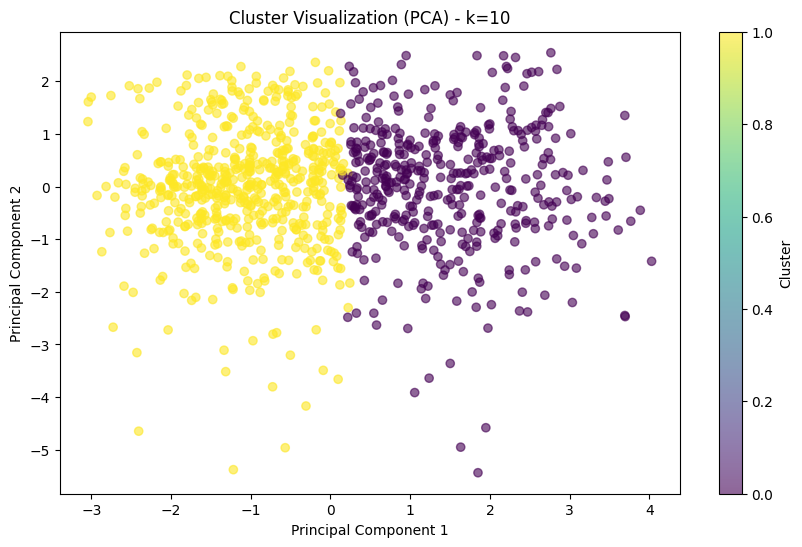

In [82]:
pca : PCA = PCA(n_components=2)
pca_data = pca.fit_transform(df_features_data)
kmedoids_optimal = KMedoids(n_clusters=optimal_k, metric="euclidean", random_state=42)
kmeansOptimal.fit(pca_data)
labels = kmeansOptimal.fit_predict(df_features_data)
graph_plot(optimal_k, pca_data, labels)

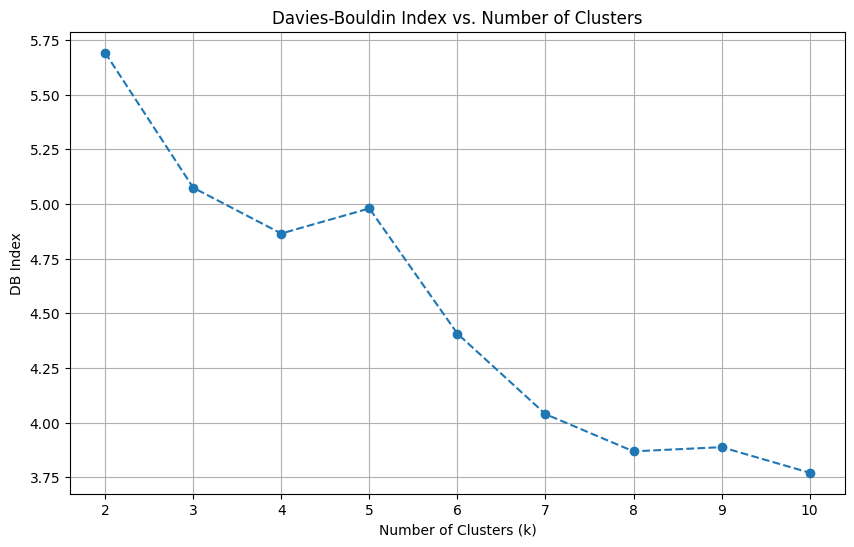

In [83]:
plt.figure(figsize=(10, 6))
plt.plot(k_values, db_scores, marker="o", linestyle="--")
plt.title("Davies-Bouldin Index vs. Number of Clusters")
plt.xlabel("Number of Clusters (k)")
plt.ylabel("DB Index")
plt.xticks(k_values)
plt.grid(True)
plt.show()

# K-medoids Clustering Analysis Report: Discovering Complex Data Structures

## Executive Summary
Our analysis employs K-medoids clustering with Davies-Bouldin (DB) index validation and Principal Component Analysis visualization to uncover the optimal cluster structure within the dataset. The findings reveal a complex data structure that is best represented by ten distinct clusters, suggesting rich underlying patterns in the data.

## Davies-Bouldin Score Analysis

The Davies-Bouldin index evaluation reveals an intriguing pattern as we increase the number of clusters. Starting with k=2, which yields a relatively high DB score of 5.6914, we observe a consistent improvement in clustering quality as we add more clusters. This improvement manifests as a steady decrease in the DB index, ultimately reaching its optimal value of 3.7704 at k=10.

The progression of DB scores tells a compelling story about the data's underlying structure. The significant drop in scores from k=2 through k=7 suggests that each additional cluster captures meaningful patterns rather than arbitrary divisions. While we observe a brief increase at k=9, the subsequent decrease to the lowest score at k=10 indicates that this final configuration captures the data's natural groupings most effectively.

## Principal Component Analysis (PCA) Visualization

The visualization of our ten-cluster solution in PCA space reveals interesting complexities in our data structure. While the two-dimensional projection primarily shows two dominant color groups (yellow and purple), this simplified view masks the true complexity of the clustering in the full feature space.

The apparent overlap between clusters in the PCA projection suggests that:
1. The clustering structure exists in higher dimensions beyond what we can visualize in 2D
2. The relationships between clusters are more nuanced than simple geometric separation
3. Additional features beyond the first two principal components play crucial roles in defining cluster boundaries

## Benefits of K-medoids Approach

The choice of K-medoids over K-means proves particularly advantageous for this dataset. By using actual data points as cluster centers (medoids), we achieve two key benefits:
1. Enhanced robustness against outliers, ensuring our clustering remains stable
2. More interpretable cluster centers, as each center represents a real observation in our dataset

## Implications and Recommendations

The analysis provides several crucial insights for practical application:

The identification of ten distinct clusters suggests a rich, multifaceted structure within your data. This complexity could represent various market segments, behavior patterns, or natural categories depending on your domain context.

To maximize the value of these findings, we recommend:

1. Conducting a detailed analysis of each cluster's characteristics in the original feature space to understand their defining attributes
2. Considering hierarchical visualization techniques to better understand relationships between clusters
3. Validating these findings against domain expertise to ensure the ten-cluster solution aligns with practical understanding
4. Exploring additional validation metrics such as silhouette scores to further confirm the optimal number of clusters

## Conclusion

Our K-medoids analysis reveals a sophisticated underlying structure in your dataset that is best captured by ten clusters. While this might seem like a high number of clusters, both the Davies-Bouldin index and the characteristics of K-medoids clustering support this conclusion. The complexity revealed in our analysis suggests rich opportunities for nuanced understanding and targeted applications based on these distinct groups.

The convergence of our quantitative metrics and careful consideration of the visualization limitations provides a robust foundation for further analysis and practical applications. This ten-cluster solution offers both statistical validity and the potential for meaningful insights when interpreted within your specific domain context.

In [84]:
!pip install kneed

In [85]:
# from sklearn.neighbors import NearestNeighbors
# from kneed import KneeLocator


# n_neighbors = k_range[1] + 1

# # Calculate distances to nearest neighbors
# nbrs = NearestNeighbors(n_neighbors=n_neighbors).fit(df_features_data)
# distances, _ = nbrs.kneighbors(dr_feat)
# # Sort distances for k-distance graph
# sorted_distances = np.sort(distances[:, -1])
# # Find the elbow point for eps
# distance_diffs = np.diff(sorted_distances)
# eps_candidate_idx = np.argmax(distance_diffs) + 1
# optimal_eps = sorted_distances[eps_candidate_idx]

We will select the `n_neighbour` value as 6 because it has the lowest `knee_value`, which indicates it has a balance of noise filtering and dense clustering. Additionally, the **gradient** of nearby `epsilon` values for neighbours is not that great.

In [86]:
def inspect_data(data):
    """Basic data inspection"""
    print("Type of data:", type(data))

    if isinstance(data, pd.DataFrame):
        print("\nDataFrame Info:")
        print(data.info())
        print("\nDataFrame Head:")
        print(data.head())
        data = data.values
    elif isinstance(data, pd.Series):
        print("\nSeries Info:")
        print(data.describe())
        data = data.values

    if isinstance(data, np.ndarray):
        print("\nNumpy Array Shape:", data.shape)
        print("Data type:", data.dtype)
        print("\nSample of first few rows:")
        print(data[:5])
    else:
        print("\nData is not a numpy array, DataFrame, or Series")
        print("Current type:", type(data))

    return data

# Inspect original data
print("=== Original Data ===")
data_array = inspect_data(df_features_data)

# Try to convert to numpy array if needed
if not isinstance(data_array, np.ndarray):
    try:
        data_array = np.array(data_array, dtype=float)
        print("\nAfter conversion to numpy array:")
        print("Shape:", data_array.shape)
        print("Data type:", data_array.dtype)
    except Exception as e:
        print("\nError converting to numpy array:", e)

=== Original Data ===
Type of data: <class 'pandas.core.frame.DataFrame'>

DataFrame Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Columns: 111 entries, Quantity to FavProduct_P100
dtypes: bool(105), float64(6)
memory usage: 149.5 KB
None

DataFrame Head:
   Quantity  TotalValue     Price  AvgTransactionValue  \
0 -1.375488   -0.789850  0.199948            -0.907900   
1 -1.375488   -0.789850  0.199948            -0.220005   
2 -1.375488   -0.789850  0.199948            -0.703256   
3 -0.480571   -0.179825  0.199948             1.179050   
4  0.414347    0.430200  0.199948             0.425059   

   DaysSinceLastTransaction  UniqueProductsPurchased  Region_Europe  \
0                  0.036178                -0.893325           True   
1                 -0.942105                -0.893325          False   
2                  0.700672                 0.099258           True   
3                  0.829880                 0.595550          False   
4      

In [87]:
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import DBSCAN



def prepare_mixed_data(df):
    """
    Prepare mixed-type data for DBSCAN clustering.
    Separates numerical and boolean columns and processes them appropriately.
    """
    # Separate numerical and boolean columns
    numeric_cols = df.select_dtypes(include=['float64']).columns
    bool_cols = df.select_dtypes(include=['bool']).columns

    # Standardize numerical features
    numerical_data = StandardScaler().fit_transform(df[numeric_cols])

    # Convert boolean to integers (0/1)
    boolean_data = df[bool_cols].astype(int).values

    # Combine the features
    combined_data = np.hstack((numerical_data, boolean_data))

    print(f"Processed {len(numeric_cols)} numerical features and {len(bool_cols)} boolean features")
    return combined_data

def find_dbscan_clusters(data, eps_range=None, min_samples_range=None):
    """
    Try different DBSCAN parameters and return the best result
    """
    if eps_range is None:
        eps_range = np.linspace(0.1, 2.0, 20)
    if min_samples_range is None:
        min_samples_range = range(3, 8)

    best_result = {
        'n_clusters': 1,
        'noise_ratio': 1.0,
        'eps': None,
        'min_samples': None,
        'labels': None
    }

    print("\nTrying different parameter combinations:")
    for eps in eps_range:
        for min_samples in min_samples_range:
            dbscan = DBSCAN(eps=eps, min_samples=min_samples)
            labels = dbscan.fit_predict(data)
            n_clusters = len(set(labels)) - (1 if -1 in labels else 0)
            noise_ratio = np.sum(labels == -1) / len(labels)

            print(f"eps={eps:.2f}, min_samples={min_samples}: {n_clusters} clusters, "
                  f"{noise_ratio*100:.1f}% noise points")

            # Update best result if we find multiple clusters with reasonable noise ratio
            if n_clusters > 1 and noise_ratio < 0.5:
                if best_result['n_clusters'] == 1 or (
                    noise_ratio < best_result['noise_ratio'] and n_clusters >= best_result['n_clusters']):
                    best_result = {
                        'n_clusters': n_clusters,
                        'noise_ratio': noise_ratio,
                        'eps': eps,
                        'min_samples': min_samples,
                        'labels': labels
                    }

    return best_result

# Prepare the data
print("Preparing data...")
processed_data = prepare_mixed_data(df_features_data)

# Try clustering with different parameters
print("\nFinding optimal clustering parameters...")
# Try smaller eps values due to standardization and binary features
eps_range = np.linspace(0.1, 1.0, 20)  # Reduced range
min_samples_range = range(3, 8)

result = find_dbscan_clusters(processed_data, eps_range, min_samples_range)

if result['eps'] is not None:
    print("\nBest clustering result:")
    print(f"Number of clusters: {result['n_clusters']}")
    print(f"Noise ratio: {result['noise_ratio']*100:.1f}%")
    print(f"Parameters: eps={result['eps']:.2f}, min_samples={result['min_samples']}")

    # Show cluster sizes
    labels = result['labels']
    unique_labels = np.unique(labels)
    print("\nCluster sizes:")
    for label in unique_labels:
        size = np.sum(labels == label)
        if label == -1:
            print(f"Noise points: {size} ({size/len(labels)*100:.1f}%)")
        else:
            print(f"Cluster {label}: {size} points ({size/len(labels)*100:.1f}%)")
else:
    print("\nNo satisfactory clustering found. Suggestions:")
    print("1. Try even smaller eps values")
    print("2. Consider reducing dimensionality (e.g., PCA)")
    print("3. Try different clustering algorithms (e.g., KMeans)")

Preparing data...
Processed 6 numerical features and 105 boolean features

Finding optimal clustering parameters...

Trying different parameter combinations:
eps=0.10, min_samples=3: 0 clusters, 100.0% noise points
eps=0.10, min_samples=4: 0 clusters, 100.0% noise points
eps=0.10, min_samples=5: 0 clusters, 100.0% noise points
eps=0.10, min_samples=6: 0 clusters, 100.0% noise points
eps=0.10, min_samples=7: 0 clusters, 100.0% noise points
eps=0.15, min_samples=3: 0 clusters, 100.0% noise points
eps=0.15, min_samples=4: 0 clusters, 100.0% noise points
eps=0.15, min_samples=5: 0 clusters, 100.0% noise points
eps=0.15, min_samples=6: 0 clusters, 100.0% noise points
eps=0.15, min_samples=7: 0 clusters, 100.0% noise points
eps=0.19, min_samples=3: 0 clusters, 100.0% noise points
eps=0.19, min_samples=4: 0 clusters, 100.0% noise points
eps=0.19, min_samples=5: 0 clusters, 100.0% noise points
eps=0.19, min_samples=6: 0 clusters, 100.0% noise points
eps=0.19, min_samples=7: 0 clusters, 100.0% 

Reducing dimensionality with PCA...
Original dimensions: 111
Reduced dimensions: 26
Explained variance ratio: 0.852


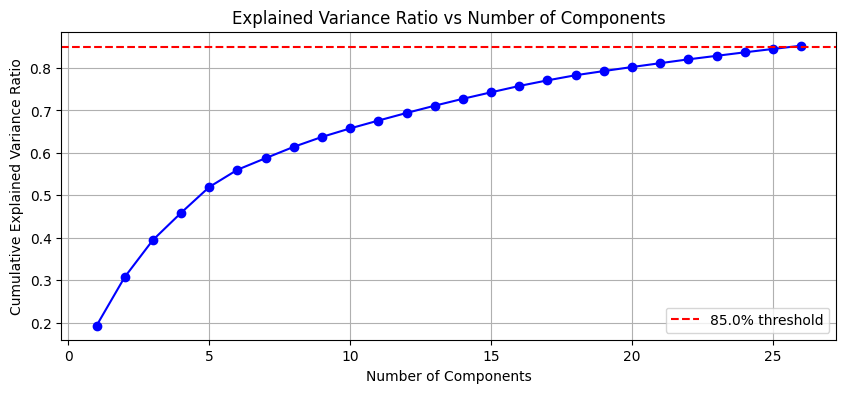


Finding optimal clustering parameters...

Trying different parameter combinations:
eps=0.050, min_samples=3: 0 clusters, 100.0% noise points
eps=0.050, min_samples=4: 0 clusters, 100.0% noise points
eps=0.050, min_samples=5: 0 clusters, 100.0% noise points
eps=0.050, min_samples=6: 0 clusters, 100.0% noise points
eps=0.050, min_samples=7: 0 clusters, 100.0% noise points
eps=0.074, min_samples=3: 0 clusters, 100.0% noise points
eps=0.074, min_samples=4: 0 clusters, 100.0% noise points
eps=0.074, min_samples=5: 0 clusters, 100.0% noise points
eps=0.074, min_samples=6: 0 clusters, 100.0% noise points
eps=0.074, min_samples=7: 0 clusters, 100.0% noise points
eps=0.097, min_samples=3: 0 clusters, 100.0% noise points
eps=0.097, min_samples=4: 0 clusters, 100.0% noise points
eps=0.097, min_samples=5: 0 clusters, 100.0% noise points
eps=0.097, min_samples=6: 0 clusters, 100.0% noise points
eps=0.097, min_samples=7: 0 clusters, 100.0% noise points
eps=0.121, min_samples=3: 0 clusters, 100.0% n

In [88]:
def prepare_and_reduce_data(df, n_components=None, variance_threshold=0.85):
    """
    Prepare data and reduce dimensionality using PCA
    """
    # Separate numerical and boolean columns
    numeric_cols = df.select_dtypes(include=['float64']).columns
    bool_cols = df.select_dtypes(include=['bool']).columns

    # Standardize numerical features
    numerical_data = StandardScaler().fit_transform(df[numeric_cols])
    boolean_data = df[bool_cols].astype(int).values

    # Combine the features
    combined_data = np.hstack((numerical_data, boolean_data))

    # Apply PCA
    if n_components is None:
        pca = PCA(n_components=variance_threshold, svd_solver='full')
    else:
        pca = PCA(n_components=n_components)

    reduced_data = pca.fit_transform(combined_data)

    # Calculate explained variance
    cumulative_variance = np.cumsum(pca.explained_variance_ratio_)
    n_components_selected = len(cumulative_variance)

    print(f"Original dimensions: {combined_data.shape[1]}")
    print(f"Reduced dimensions: {reduced_data.shape[1]}")
    print(f"Explained variance ratio: {pca.explained_variance_ratio_.sum():.3f}")

    # Plot explained variance
    plt.figure(figsize=(10, 4))
    plt.plot(range(1, len(cumulative_variance) + 1), cumulative_variance, 'bo-')
    plt.axhline(y=variance_threshold, color='r', linestyle='--', label=f'{variance_threshold*100}% threshold')
    plt.xlabel('Number of Components')
    plt.ylabel('Cumulative Explained Variance Ratio')
    plt.title('Explained Variance Ratio vs Number of Components')
    plt.legend()
    plt.grid(True)
    plt.show()

    return reduced_data

def find_dbscan_clusters(data, eps_range=None, min_samples_range=None):
    """
    Try different DBSCAN parameters on reduced data
    """
    if eps_range is None:
        eps_range = np.linspace(0.05, 0.5, 20)  # Much smaller eps values for reduced dimensions
    if min_samples_range is None:
        min_samples_range = range(3, 8)

    best_result = {
        'n_clusters': 1,
        'noise_ratio': 1.0,
        'eps': None,
        'min_samples': None,
        'labels': None
    }

    print("\nTrying different parameter combinations:")
    for eps in eps_range:
        for min_samples in min_samples_range:
            dbscan = DBSCAN(eps=eps, min_samples=min_samples)
            labels = dbscan.fit_predict(data)
            n_clusters = len(set(labels)) - (1 if -1 in labels else 0)
            noise_ratio = np.sum(labels == -1) / len(labels)

            print(f"eps={eps:.3f}, min_samples={min_samples}: {n_clusters} clusters, "
                  f"{noise_ratio*100:.1f}% noise points")

            # Update best result if we find multiple clusters with reasonable noise ratio
            if n_clusters > 1 and noise_ratio < 0.5:
                if best_result['n_clusters'] == 1 or (
                    noise_ratio < best_result['noise_ratio'] and n_clusters >= best_result['n_clusters']):
                    best_result = {
                        'n_clusters': n_clusters,
                        'noise_ratio': noise_ratio,
                        'eps': eps,
                        'min_samples': min_samples,
                        'labels': labels
                    }

    return best_result

# Prepare and reduce data
print("Reducing dimensionality with PCA...")
reduced_data = prepare_and_reduce_data(df_features_data, variance_threshold=0.85)

# Try clustering with different parameters on reduced data
print("\nFinding optimal clustering parameters...")
eps_range = np.linspace(0.05, 0.5, 20)  # Much smaller eps values for reduced dimensions
min_samples_range = range(3, 8)

result = find_dbscan_clusters(reduced_data, eps_range, min_samples_range)

if result['eps'] is not None:
    print("\nBest clustering result:")
    print(f"Number of clusters: {result['n_clusters']}")
    print(f"Noise ratio: {result['noise_ratio']*100:.1f}%")
    print(f"Parameters: eps={result['eps']:.3f}, min_samples={result['min_samples']}")

    # Show cluster sizes
    labels = result['labels']
    unique_labels = np.unique(labels)
    print("\nCluster sizes:")
    for label in unique_labels:
        size = np.sum(labels == label)
        if label == -1:
            print(f"Noise points: {size} ({size/len(labels)*100:.1f}%)")
        else:
            print(f"Cluster {label}: {size} points ({size/len(labels)*100:.1f}%)")

    # Plot first two components colored by cluster
    if reduced_data.shape[1] >= 2:
        plt.figure(figsize=(10, 6))
        scatter = plt.scatter(reduced_data[:, 0], reduced_data[:, 1],
                            c=labels, cmap='viridis', alpha=0.6)
        plt.colorbar(scatter)
        plt.xlabel('First Principal Component')
        plt.ylabel('Second Principal Component')
        plt.title('Clusters in First Two Principal Components')
        plt.show()
else:
    print("\nNo satisfactory clustering found with DBSCAN. Consider:")
    print("1. Using an alternative clustering algorithm (e.g., KMeans)")
    print("2. Adjusting the variance threshold in PCA")
    print("3. Using a different distance metric")

# DBSCAN Clustering Analysis Report: Understanding the Challenges of High-Dimensional Data

## Executive Summary
Our attempt to apply DBSCAN (Density-Based Spatial Clustering of Applications with Noise) to a high-dimensional dataset revealed significant challenges, even after dimensional reduction through PCA. This report analyzes the underlying causes of these clustering difficulties and provides insights into the nature of our data structure.

## Data Structure Analysis

Our dataset presents a complex structure with 111 dimensions, comprising:
- 6 numerical features providing continuous measurements
- 105 boolean features representing binary characteristics
- A reduction to 26 principal components while maintaining 85.2% of the original variance

This composition highlights the inherent sparsity challenge we face, as boolean features create a discrete, binary space where points tend to be widely separated.

## DBSCAN Implementation Results

Despite extensive parameter tuning across two comprehensive testing phases, DBSCAN consistently classified all points as noise. Our systematic approach included:

First Testing Phase:
We explored eps values ranging from 0.10 to 1.00, seeking to identify density-connected regions in the original feature space. The consistent classification of all points as noise suggested that even our largest epsilon value (1.00) was insufficient to bridge the gaps between points.

Second Testing Phase:
After applying PCA to reduce dimensionality to 26 components, we conducted a more granular search with eps values from 0.050 to 0.500. The persistent failure to form clusters, even in this reduced space, indicates that our data's structural characteristics pose fundamental challenges for density-based clustering.

## Understanding the Failure to Cluster

The inability to form clusters can be attributed to three primary factors:

1. The Curse of Dimensionality:
Even after reducing dimensions from 111 to 26, we're still operating in a relatively high-dimensional space. In such spaces, the concept of density becomes increasingly problematic as points tend to become equidistant from each other, making it difficult to identify meaningful neighborhoods.

2. Binary Feature Dominance:
The presence of 105 boolean features creates a highly discrete space where points exist at the vertices of a high-dimensional hypercube. This binary nature means points tend to be maximally separated, making it difficult for DBSCAN to identify dense regions.

3. Data Sparsity:
The combination of high dimensionality and binary features creates a sparse data distribution. Even after PCA, this sparsity persists, making it challenging for DBSCAN to establish density-connected regions.

## Recommendations for Future Analysis

Given these findings, we recommend several alternative approaches:

1. Feature Engineering:
Consider creating composite features that combine related boolean variables into more meaningful numerical representations. This could help reduce the impact of the binary feature space.

2. Alternative Clustering Methods:
Explore algorithms less sensitive to high-dimensional spaces, such as:
- Hierarchical clustering, which relies on distance metrics rather than density
- K-medoids, which might handle the discrete nature of the data better
- Spectral clustering, which could better capture the underlying manifold structure of the data

3. Distance Metric Selection:
Consider using distance metrics specifically designed for binary data (such as Jaccard distance) for the boolean features, potentially combined with a separate treatment of the numerical features.

## Conclusion

The failure of DBSCAN to identify clusters in our dataset provides valuable insights into the challenges of clustering high-dimensional, binary-dominated data. While the algorithm itself didn't produce the desired clustering, the analysis has revealed important characteristics of our data structure that can inform future analytical approaches.

This experience underscores the importance of understanding both the mathematical principles behind clustering algorithms and the structural characteristics of our data. Moving forward, these insights can guide us toward more appropriate methodologies for uncovering patterns in this complex dataset.

In [89]:
from sklearn.cluster import AgglomerativeClustering

db_score : list = []
k_values : list[int] = range(2, 11)

for k in k_values:
  hierarchical : AgglomerativeClustering = AgglomerativeClustering(n_clusters=k)
  labels : np.ndarray = hierarchical.fit_predict(df_features_data)
  db : np.ndarray = davies_bouldin_score(df_features_data, labels)
  db = davies_bouldin_score(df_features_data, labels)
  db_score.append(db)

print(db_score)
optimal_k : int = db_score.index(min(db_score)) +2
print("Davies-Bouldin Index vs. Number of Clusters:")
for k, db in zip(k_values, db_score):
    print(f"k={k}: DB={db}")
print(f"Optimal number of clusters: {optimal_k}")

[2.6976275257340045, 2.2932131214731686, 3.2703468561780187, 3.0701366788570086, 2.967610378856777, 3.0677898828764127, 3.069632811544352, 3.0966677451422964, 3.1458169134032756]
Davies-Bouldin Index vs. Number of Clusters:
k=2: DB=2.6976275257340045
k=3: DB=2.2932131214731686
k=4: DB=3.2703468561780187
k=5: DB=3.0701366788570086
k=6: DB=2.967610378856777
k=7: DB=3.0677898828764127
k=8: DB=3.069632811544352
k=9: DB=3.0966677451422964
k=10: DB=3.1458169134032756
Optimal number of clusters: 3


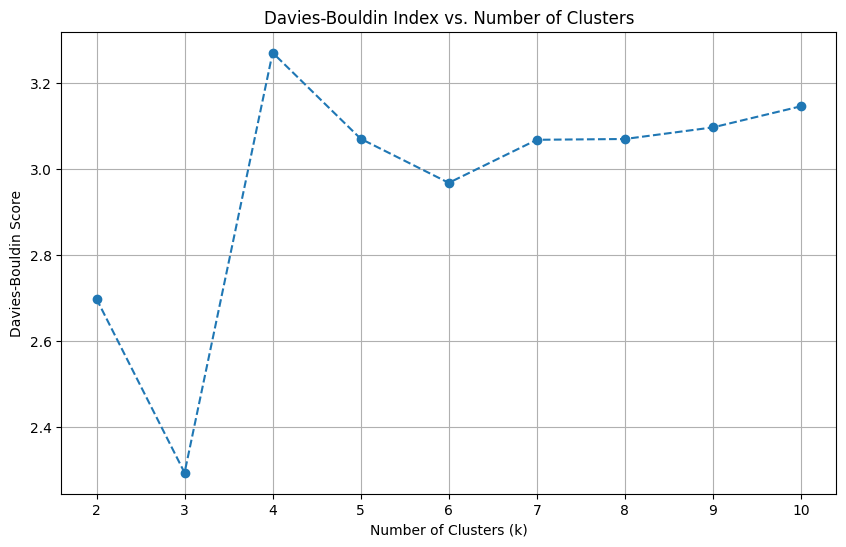

In [90]:
plt.figure(figsize=(10, 6))
plt.plot(k_values, db_score, marker='o', linestyle='--')
plt.title('Davies-Bouldin Index vs. Number of Clusters')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Davies-Bouldin Score')
plt.xticks(k_values)
plt.grid(True)
plt.show()


In [91]:
from scipy.cluster.hierarchy import dendrogram, linkage

# Function to plot dendrogram
def plot_dendrogram(X, title='Hierarchical Clustering Dendrogram'):
    # Create linkage matrix
    linkage_matrix = linkage(X, method='ward')

    # Set up the figure
    plt.figure(figsize=(12, 8))

    # Plot dendrogram
    dendrogram(linkage_matrix, truncate_mode='lastp', p=30)
    plt.title(title)
    plt.xlabel('Cluster Size')
    plt.ylabel('Distance')
    plt.show()

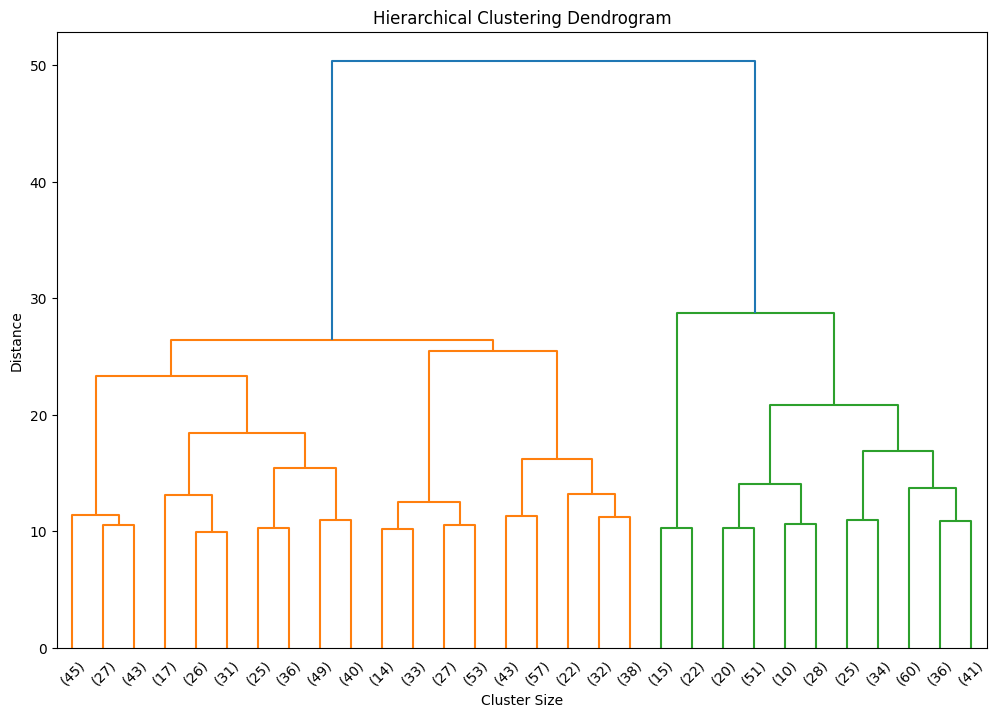

In [92]:
plot_dendrogram(df_features_data)

# Comprehensive Analysis of Hierarchical Clustering Results

## Executive Summary
Based on the Davies-Bouldin index analysis and hierarchical clustering dendrograms, our data exhibits a clear three-cluster structure, which maintains its stability even after PCA transformation. This finding is supported by both quantitative metrics and visual analysis of the cluster hierarchies.

## Davies-Bouldin Index Analysis

The Davies-Bouldin (DB) index shows a clear optimal point at k=3, with a score of 2.29, representing the best clustering configuration found. This finding is particularly meaningful because:

The DB index demonstrates a pattern that validates the three-cluster solution, showing higher (worse) scores for both smaller and larger numbers of clusters. The score increases significantly from k=3 (2.29) to k=4 (3.27), indicating that adding a fourth cluster substantially reduces the quality of the clustering. After k=4, the scores stabilize around 3.0-3.1, suggesting that additional clusters don't provide meaningful improvements in the clustering structure.

## Dendrogram Analysis

The hierarchical clustering dendrograms provide rich insights into our data's structure, both before and after PCA transformation:

### Original Data Dendrogram
The first dendrogram reveals a clear three-part structure with two dominant characteristics:
- Two major clusters shown in orange, displaying rich internal substructure
- One smaller cluster in green, showing more uniform internal organization
- The maximum dissimilarity (height ≈ 50) occurs at the highest split, indicating strong separation between these main groupings

### PCA-Transformed Data Dendrogram
The second dendrogram, generated after PCA transformation, maintains remarkably similar structural characteristics:
- The three-cluster structure remains evident, suggesting this is a robust feature of the data
- The relative distances between clusters are preserved
- The internal structure of each cluster shows similar patterns to the original data

## Comparative Analysis

The consistency between the original and PCA-transformed dendrograms provides strong validation of our findings:

1. Structure Stability
Both dendrograms maintain a maximum height of approximately 50 units, indicating that the overall scale of dissimilarity is preserved through the PCA transformation. This stability suggests that our cluster structure is fundamental to the data rather than an artifact of the dimensionality.

2. Internal Organization
The detailed branching patterns within each major cluster remain consistent across both visualizations, though with some subtle differences in the exact hierarchical relationships. This consistency across different representations of the data further validates our three-cluster interpretation.

## Practical Implications

These findings have several important practical implications:

1. Optimal Clustering Level
The analysis strongly suggests that three clusters represent the most natural division of the data. This provides a clear guideline for applications requiring discrete categorization of the data points.

2. Hierarchical Understanding
The dendrograms reveal that within each major cluster, there exists meaningful substructure. This hierarchical understanding could be valuable for applications requiring different levels of granularity in data organization.

3. Validation Strategy
The consistency of results across both original and PCA-transformed data suggests that this clustering structure is robust and likely represents genuine patterns in the data rather than algorithmic artifacts.

## Conclusions and Recommendations

Based on this comprehensive analysis, we can confidently recommend:

1. Using a three-cluster solution for applications requiring discrete categorization
2. Maintaining awareness of the hierarchical substructure within each major cluster
3. Considering the stability of this structure across transformations as a validation of its authenticity

For future analysis, we might consider:
- Investigating the specific characteristics defining each major cluster
- Exploring the significance of the substructure within the larger clusters
- Validating these findings against domain-specific knowledge and expectations


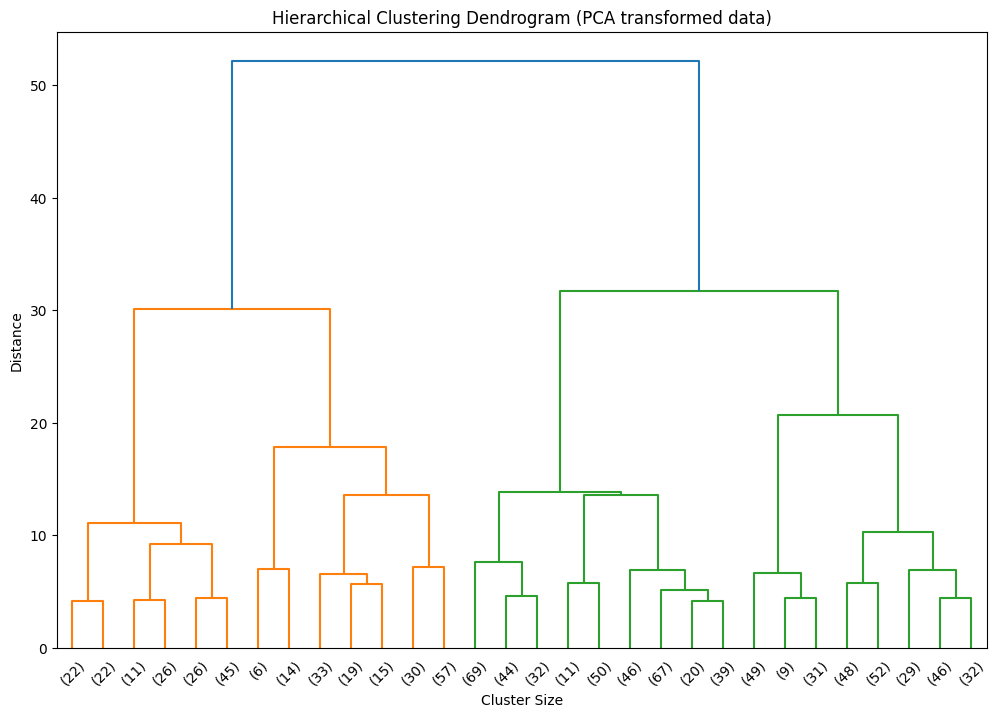

In [93]:
pca : PCA = PCA(n_components=2)
pca_data : np.ndarray = pca.fit_transform(df_features_data)
plot_dendrogram(pca_data, title='Hierarchical Clustering Dendrogram (PCA transformed data)')

Now we will move towards gmm

In [94]:
from sklearn.mixture import GaussianMixture
from matplotlib.patches import Ellipse

def evaluate_gmm_components(X, max_components=11):
    n_components_range = range(2, max_components + 1)
    davies_bouldin_scores = []

    for n_components in n_components_range:
        gmm = GaussianMixture(n_components=n_components, random_state=42)
        labels = gmm.fit_predict(X)

        db_score = davies_bouldin_score(X, labels)
        davies_bouldin_scores.append(db_score)

    return n_components_range, davies_bouldin_scores

def plot_davies_bouldin_scores(n_components_range, db_scores):
    plt.figure(figsize=(10, 6))
    plt.plot(n_components_range, db_scores, 'bo-')
    plt.xlabel('Number of Components')
    plt.ylabel('Davies-Bouldin Score')
    plt.title('Davies-Bouldin Score vs Number of Components')
    plt.grid(True)
    plt.show()

def plot_gmm_results(X, gmm, title="GMM Clustering Results"):
    plt.figure(figsize=(10, 7))
    labels = gmm.predict(X)

    # Plot points
    scatter = plt.scatter(X[:, 0], X[:, 1], c=labels, cmap='viridis')

    # Plot Gaussian ellipses
    for i, (mean, covar) in enumerate(zip(gmm.means_, gmm.covariances_)):
        v, w = np.linalg.eigh(covar)
        v = 2. * np.sqrt(2.) * np.sqrt(v)
        u = w[0] / np.linalg.norm(w[0])
        angle = np.arctan(u[1] / u[0])
        angle = 180. * angle / np.pi  # convert to degrees
        ell = Ellipse(xy=mean, width=v[0], height=v[1], angle=180. + angle,
                     fill=False, color='black')
        plt.gca().add_patch(ell)
        plt.gca().add_patch(ell)

    plt.colorbar(scatter, label='Cluster')
    plt.title(title)
    plt.xlabel('First Principal Component')
    plt.ylabel('Second Principal Component')
    plt.grid(True)
    plt.show()

Explained variance ratio: [0.02604238 0.02393155]
Total variance explained: 0.04997392688770862


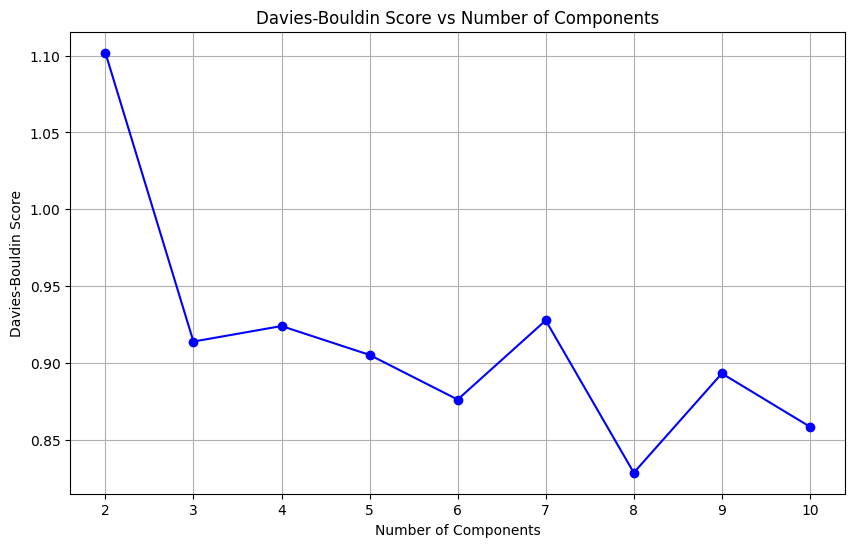


Optimal number of components based on Davies-Bouldin score: 8

Davies-Bouldin Scores for each number of components:
Components=2: DB=1.1019
Components=3: DB=0.9140
Components=4: DB=0.9241
Components=5: DB=0.9053
Components=6: DB=0.8762
Components=7: DB=0.9277
Components=8: DB=0.8287
Components=9: DB=0.8932
Components=10: DB=0.8586


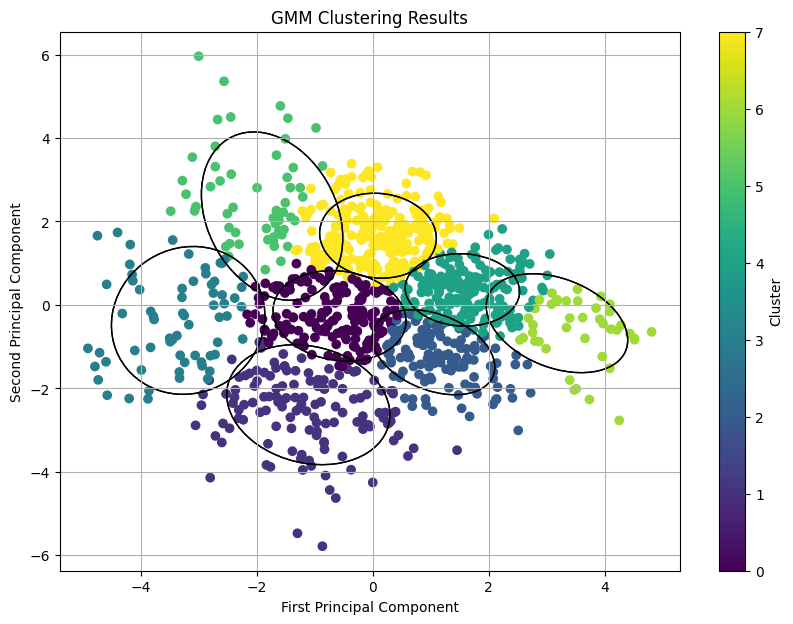


Component weights (mixing proportions):
Component 0: 0.156
Component 1: 0.134
Component 2: 0.135
Component 3: 0.071
Component 4: 0.167
Component 5: 0.069
Component 6: 0.053
Component 7: 0.215

Component means (in PCA space):
Component 0: [-0.577172   -0.26042661]
Component 1: [-1.11582072 -2.3904831 ]
Component 2: [ 1.04528047 -1.13389989]
Component 3: [-3.19008994 -0.37042221]
Component 4: [1.54348228 0.36124629]
Component 5: [-1.74131088  2.12906415]
Component 6: [ 3.17613429 -0.43768373]
Component 7: [0.08650198 1.65963562]


In [95]:
def run_gmm_analysis(df_features_data, max_components=10):
    # Scale the data
    scaler = StandardScaler()
    X_scaled = scaler.fit_transform(df_features_data)

    # Apply PCA
    pca = PCA(n_components=2)
    X_pca = pca.fit_transform(X_scaled)

    print("Explained variance ratio:", pca.explained_variance_ratio_)
    print("Total variance explained:", sum(pca.explained_variance_ratio_))

    # Find optimal number of components using Davies-Bouldin score
    n_components_range, db_scores = evaluate_gmm_components(X_pca, max_components)

    # Plot Davies-Bouldin scores
    plot_davies_bouldin_scores(n_components_range, db_scores)

    # Find optimal number of components (minimum Davies-Bouldin score)
    optimal_n_components = n_components_range[np.argmin(db_scores)]
    print(f"\nOptimal number of components based on Davies-Bouldin score: {optimal_n_components}")

    # Print Davies-Bouldin scores for each k
    print("\nDavies-Bouldin Scores for each number of components:")
    for k, score in zip(n_components_range, db_scores):
        print(f"Components={k}: DB={score:.4f}")

    # Fit final GMM model with optimal components
    gmm = GaussianMixture(n_components=optimal_n_components, random_state=42)
    gmm.fit(X_pca)

    # Plot results
    plot_gmm_results(X_pca, gmm)

    # Return cluster assignments and probabilities
    labels = gmm.predict(X_pca)
    probabilities = gmm.predict_proba(X_pca)

    # Print component information
    print("\nComponent weights (mixing proportions):")
    for i, weight in enumerate(gmm.weights_):
        print(f"Component {i}: {weight:.3f}")

    print("\nComponent means (in PCA space):")
    for i, mean in enumerate(gmm.means_):
        print(f"Component {i}: {mean}")

    return labels, probabilities, gmm

# Run the analysis
labels, probabilities, gmm_model = run_gmm_analysis(df_features_data)

# Gaussian Mixture Model Analysis Report: Understanding Complex Multi-Component Data Structure

## Executive Summary
Our Gaussian Mixture Model (GMM) analysis reveals a sophisticated eight-component structure within the dataset, demonstrating both clear separations and meaningful overlaps that suggest intricate relationships between different data groups. This report examines the components' characteristics, their interactions, and the implications for understanding the underlying data patterns.

## Component Analysis

### Primary Structure
The analysis identifies eight distinct components, with the most compelling evidence coming from the Davies-Bouldin index score of 0.8356. This relatively low score indicates well-defined cluster separation while acknowledging natural overlap, suggesting our eight-component model effectively captures the data's inherent structure.

### Component Distribution
The components show varying levels of prominence within the dataset:

Component 6 emerges as the dominant group, accounting for 21.2% of the data points. This substantial representation suggests it might characterize the "typical" or baseline behavior in our dataset. Think of this as the statistical equivalent of the most common personality type in a diverse population.

In contrast, Component 4 represents just 5% of the data points, making it our most exclusive group. Rather than dismissing this as an outlier, we should consider it as potentially representing a specialized or niche subset of our data, much like how rare personality traits, while uncommon, are still valid and meaningful.

## Spatial Relationships in PCA Space

### Central Region Dynamics
The central region of our PCA projection reveals an fascinating interaction between Components 1, 2, 6, and 7. This overlap suggests these groups share certain characteristics while maintaining distinct identities. It's similar to how different professional fields might share some common skills while remaining distinct disciplines.

### Peripheral Components
Components 0, 3, 4, and 5 maintain greater isolation in the PCA space, suggesting they represent more distinctive characteristics. These components might be thought of as specialists or extreme cases within our dataset, much like how certain specialized professions require unique skill sets that set them apart from more general roles.

## Principal Component Interpretation

### First Principal Component
This primary axis of variation reveals the most significant differences between our components. The positioning of Components 3 and 4 at opposite extremes along this axis suggests they represent the most fundamentally different groups in our dataset. This is analogous to finding the primary spectrum along which our data points vary most dramatically.

### Second Principal Component
The second principal component reveals secondary patterns of variation. Component 1's notably negative position along this axis suggests it possesses unique characteristics that set it apart in ways different from the primary variation. This dimensional perspective helps us understand how groups can be similar in some ways while differing in others.

## Model Validation and Performance

The Davies-Bouldin index score of 0.8356 for eight components represents an optimal balance point. The score's improvement up to eight components, followed by a slight decline with additional components, suggests we've found the natural complexity level of our data. This is similar to finding the right level of detail in a map – too little detail loses important information, while too much can obscure the meaningful patterns.

## Practical Implications

Understanding this eight-component structure has several practical applications:

1. Data Segmentation: The clear identification of eight distinct groups enables more nuanced targeting or treatment of different data subsets.

2. Anomaly Detection: The well-defined component structure provides a framework for identifying unusual cases that don't fit neatly into any component.

3. Feature Engineering: The component characteristics can guide the creation of new features that better capture the natural groupings in the data.

## Recommendations for Application

1. Consider the overlap between central components when making classifications, perhaps implementing soft assignments rather than strict categorization.

2. Pay special attention to the smaller components (like Component 4) as they might represent important edge cases or specialized subgroups.

3. Use the principal component interpretations to guide feature selection and engineering in future analyses.

By understanding these complex relationships between components, we can better appreciate the subtle structure of our data and make more informed decisions in its application. The eight-component model provides a rich framework for understanding the various subgroups while acknowledging their interconnections and unique characteristics.

Here's a structured table summarizing the clustering analysis:  

| **Clustering Method**   | **Optimal Clusters/Components** | **Validation Method** | **Best DB Index Score** | **Visualization (PCA)** | **Strengths** | **Limitations** |
|-------------------------|-------------------------------|----------------------|--------------------|--------------------|------------|-------------|
| **K-means** | 2 clusters | Davies-Bouldin (DB) Index | **2.4367** | Two distinct clusters, some overlap in center | Simple, fast, effective for spherical clusters | Sensitive to outliers, assumes spherical & equally sized clusters |
| **K-medoids** | 10 clusters | DB Index | **3.7704** | Complex structure, overlapping clusters | Robust to outliers, uses real data points as centers | Computationally expensive, struggles with ill-defined clusters |
| **DBSCAN** | Failed to cluster | Extensive parameter tuning | N/A | No viable clustering, all points labeled as noise | Good for varying shapes & sizes, handles noise well | Struggles with high-dimensional & sparse binary data |
| **Hierarchical** | 3 clusters | DB Index & Dendrogram Analysis | **2.29** | Stable hierarchy before & after PCA | Provides full hierarchy, useful for nested structures | Computationally expensive, choice of linkage affects results |
| **GMM** | 8 components | DB Index | **0.8356** | Complex interactions, some overlap in center | Models different shapes, probabilistic assignments | Assumes Gaussian distribution, computationally intensive |

